In [2]:
#Loading Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
mcc=pd.read_csv(r'C:\Users\Sachin Koli\Downloads\Malignant Comments Classifier Project\train.csv')

In [4]:
mcc

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  highly_malignant  rude  threat  abuse  loathe  
0               0                 0     0       0      0       0  
1               0                 0     0       0      0       0  
2               0                 0     0       0      0       0  
3               0                 0     0       0      0       0  
4               0                 0     0       0      0       0  
...           ...               ...   ...     ...    ...     ...  
159566          0                 0     0       0      0       0  
159567          0                 0     0       0      0       0  
159568          0                 0     0       0      0       0  
159569          0                 0     0       0      0       0  
159570          0                 0     0       0      0       0  

[159571 rows x 8 columns]

In [5]:
# Checking the total rows and columns in our dataset.
mcc.shape

(159571, 8)

Dataset contains 1,59,571 observations and each observation having 8 Unique Features.

In [6]:
# Checking Datatypes of the features.
mcc.dtypes.to_frame().rename(columns={0:'Data Type'})

Data Type
id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64

There are 2 object feature columns and 6 int64 feature coulumns.

In [7]:
print('We have {} columns : \n{}'.format(len(mcc.columns),mcc.columns.values))

We have 8 columns : 
['id' 'comment_text' 'malignant' 'highly_malignant' 'rude' 'threat'
 'abuse' 'loathe']


This dataset contains 8 different features named as:-

>'id' = It includes unique Ids associated with each comment text given. 

>'comment_text' = This column contains the comments extracted from various social media platforms. 

>'malignant' = It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 

>'highly_malignant' = It denotes comments that are highly malignant and hurtful. 

>'rude' = It denotes comments that are very rude and offensive.

>'threat' = It contains indication of the comments that are giving any threat to someone.

>'abuse' = It is for comments that are abusive in nature. 

>'loathe' = It describes the comments which are hateful and loathing in nature.  

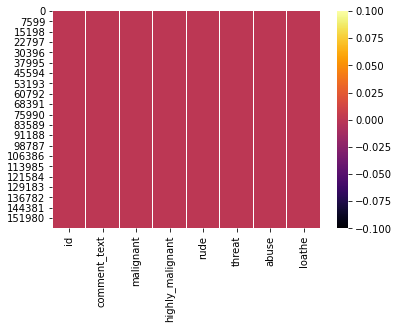

In [8]:
#Checking of null values in our dataset by passing a heatmap function.

sns.heatmap(mcc.isnull(),cmap='inferno')

Form heatmap we get to know that there are no null values in our dataset.

In [9]:
#Some basic statistics using Describe() function
mcc.describe()

malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

OBSERVATIONS:

Some basic inferences about the numerical columns can be inferred from the describe function.

As all these numerical features are binary features - either 0 and 1 as observations. We can see that these columns are imbalanced as atleast 75% of the data is 0 and only 25% or less of the data has label 1.

malignant


0    144277
1     15294
Name: malignant, dtype: int64


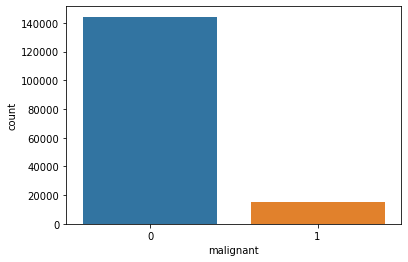

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


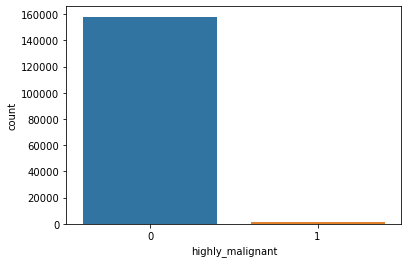

loathe


0    158166
1      1405
Name: loathe, dtype: int64


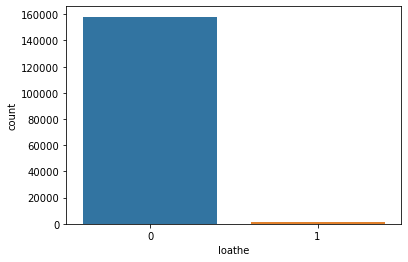

rude


0    151122
1      8449
Name: rude, dtype: int64


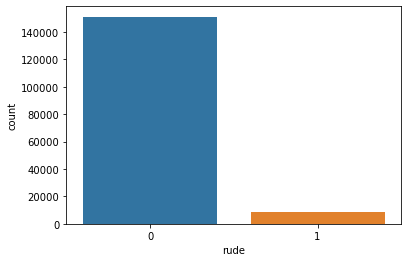

abuse


0    151694
1      7877
Name: abuse, dtype: int64


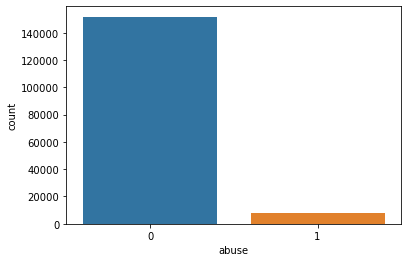

threat


0    159093
1       478
Name: threat, dtype: int64


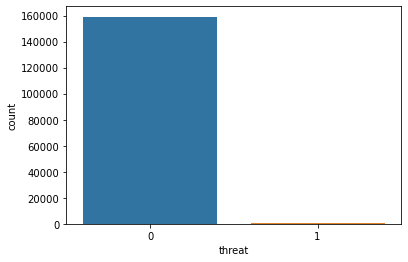

In [10]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(mcc[i].value_counts())
    sns.countplot(mcc[i])
    plt.show()

Observation:
> Malignant= There are 144277 comments which are not malignant and there are 15294 comments by people which are malignant.

> highly_malignant= There are 157976 comment which does not come in highly malignant and 1595 comments are highly malignant.

> loathe= There are 1405 comments showing dislike/disgust.

> rude= There are 8449 such comments showing discourtesy.

> abuse= There are 7877 such comments in which abusive words are used.

> threat= There are  478 such comments in which people are showing threat against that particular post.

In [11]:
# Using Value count() function to see class imbalance in the numerical columns.
num_col=[i for i in mcc.columns if mcc[i].dtypes!='object']
for i in num_col:
    print(mcc[i].value_counts())

0    144277
1     15294
Name: malignant, dtype: int64
0    157976
1      1595
Name: highly_malignant, dtype: int64
0    151122
1      8449
Name: rude, dtype: int64
0    159093
1       478
Name: threat, dtype: int64
0    151694
1      7877
Name: abuse, dtype: int64
0    158166
1      1405
Name: loathe, dtype: int64


In [12]:
#Displaying the percentage of the obsevrations labelled as 1 for different classes. 
(mcc[num_col].sum()/len(mcc)*100).to_frame().rename(columns={0:'Percentage'})

Percentage
malignant           9.584448
highly_malignant    0.999555
rude                5.294822
threat              0.299553
abuse               4.936361
loathe              0.880486

OBSERVATION:

Maximum 9.58% of the class are labelled as 1 in feature malignant. And low as 0.29 percent of the observation is labelled as 1 for the feature threat.
> Dataset is imbalanced.

In [13]:
#Checking the number of words present in each comment of the comments_texts
mcc['Length']=mcc['comment_text'].str.len()
mcc

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  highly_malignant  rude  threat  abuse  loathe  Length  
0               0                 0     0       0      0       0     264  
1               0                 0     0       0      0       0     112  
2               0                 0     0       0      0       0     233  
3               0                 0     0       0      0       0     622  
4               0                 0     0       0      0       0      67  
...           ...               ...   ...     ...    ...     ...     ...  
159566          0                 0     0       0      0       0     295  
159567          0                 0     0       0      0       0      99  
159568          0                 0     0       0      0       0      81  
159569          0                 0     0       0      0       0     116  
159570          0                 0     0       0      0       0     189  

[159571 rows x 9 columns]

The lengthiest comment has 5000 words
The shortest comment has 5 words


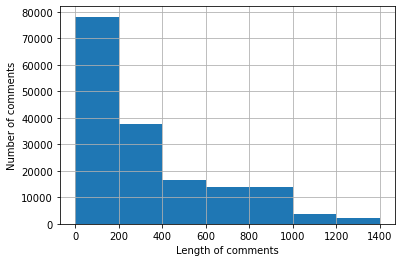

In [14]:
# Observing the length of the comments using histogram.
print('The lengthiest comment has {} words'.format(mcc['Length'].max()))
print('The shortest comment has {} words'.format(mcc['Length'].min()))
bins=[0,200,400,600,1000,1200,1400]
plt.hist(mcc['Length'],bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')
plt.grid(True)
plt.show()

OBSERVATIONS:

>More than 75000 comments are of length 0-200. Only a few comments have more than 1000 words.

In [15]:
#Checking the number of comments with excessive words.
print("Number of comments that have more than 1000 words", len(mcc[mcc['Length']>1000]['Length']))
print("Number of comments that have more than 400 words", len(mcc[mcc['Length']>400]['Length']))

Number of comments that have more than 1000 words 13362
Number of comments that have more than 400 words 43678


OBSERVATIONS:

13662 out of 159570 observations have more than 1000 words in the comment_text and 43,678 comments have more than 400 words each.

>If we consider deleting the comments with more than 400 words we still would be left with enough data to train the model. Very large comments can pose serious problems to the training dataset, it will add excessive words that will cause training time to increase and accuracy to decrease.

In [16]:
#Dropping the comments having more than 400 words.
data_new=mcc[mcc['Length']<400]
print('Old data shape: ',mcc.shape)
print('New data shape: ',data_new.shape)

Old data shape:  (159571, 9)
New data shape:  (115786, 9)


# Preprocessing

Preprocessing involved the following steps:

>Removing Punctuations and other special characters.

>Splitting the comments into individual words.

>Removing Stop Words.

>Stemming and Lemmatising.

>Applying Count Vectoriser.

In [17]:
import re
import string

# remove all numbers with letters attached to them
alphanumeric=lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower=lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n= lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii= lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
data_new['comment_text'] = data_new['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

data_new['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

Separating the dataset into six sections with comments_text and one category.

In [18]:
data_mal=data_new.loc[:,['comment_text','malignant']]
data_high_mal=data_new.loc[:,['comment_text','highly_malignant']]
data_rude=data_new.loc[:,['comment_text','rude']]
data_threat=data_new.loc[:,['comment_text','threat']]
data_abuse=data_new.loc[:,['comment_text','abuse']]
data_loathe=data_new.loc[:,['comment_text','loathe']]

# Creating Wordcloud

Wordcloud is useful in displaying the frequently occuring words.

In [19]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [20]:
#Defining a fucntion for wordcloud

def wordcloud(df,label):
    set=df[df[label]==1]
    
    text=set.comment_text.values
    wc= WordCloud(background_color="purple",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Frequent words in {}".format(label), fontsize=20)
    plt.tight_layout(pad = 0)
    plt.imshow(wc.recolor(colormap= 'gnuplot' , random_state=244), alpha=0.98)

In [21]:
#Calling the function wordcloud for label - malignant
wordcloud(data_mal,'malignant')

OBSERVATIONS:

Negative words like 'fuck', 'dont', 'fucking', 'asshole', 'bitch', 'blocked' can be seen in the wordcloud for class malignant.

In [22]:
wordcloud(data_high_mal,'highly_malignant')

OBSERVATION:

Frequently occuring derogatory words that we can see in the feature highly mlaignant are: 'fuck', 'asshole', 'shit', 'dick', etc.

In [23]:
wordcloud(data_rude,'rude')

OBSERVATION:

bulling words that we can see for feature 'rude' are: 'fuck', 'shit', 'ass', 'faggot', 'stupid', etc.

In [24]:
wordcloud(data_threat,'threat')

Threatful words like 'kill', 'die', 'rape', 'death' can be seen in comment_text for feature threat.

In [25]:
wordcloud(data_abuse,'abuse')

Abusive words frequently occurng for feature 'abuse' are : 'asshole', 'stupid', 'bitch', 'idiot' etc.

In [26]:
wordcloud(data_loathe,'loathe')

Disgust words occuring frequently for feature 'loathe' are : 'nazi', 'nigger', 'hate', 'jew', 'racist', 'nigga', 'homosexual', etc.

# Balancing Dataset

We saw that comments that are malignant makes up less than 10% of the total comments. We have a high imbalanced class.

We can deal with imbalance class by taking a subset of the data where the proportion of the malignant comments are at least 20% in relation to non-toxic comments.

# Balancing Malignant feature

In [27]:
#count for malignant comments.
data_mal[data_mal['malignant']==1].count()

comment_text    12862
malignant       12862
dtype: int64

In [28]:
d_mal_1=data_mal[data_mal['malignant']==1].iloc[0:5000,:]
d_mal_0=data_mal[data_mal['malignant']==0].iloc[0:5000,:]
print(d_mal_1.shape,'\t',d_mal_0.shape)

(5000, 2) 	 (5000, 2)


In [29]:
#Concatenating the 5000 observations labelled as 1 with 5000 observations labelled as 0 to create a balanced class dataset.
data_mal=pd.concat([d_mal_0,d_mal_1],axis=0)
data_mal

comment_text  malignant
0      explanation why the edits made under my userna...          0
1      d aww  he matches this background colour i m s...          0
2      hey man  i m really not trying to edit war  it...          0
4      you  sir  are my hero  any chance you remember...          0
5         congratulations from me as well  use the to...          0
...                                                  ...        ...
61323  you piece of mexican burrito      leave our pa...          1
61362                            fuck you white trash             1
61368                   hahaha   pussy b itch you re a            1
61382  wtf   what is your problem  im not spamming  j...          1
61387  and the reason for my acctions on dave s userp...          1

[10000 rows x 2 columns]

# Balancing highly malignant feature

In [30]:
#Checking the count of observations classified as highly_malignant.
data_high_mal[data_high_mal['highly_malignant']==1].count()

comment_text        1355
highly_malignant    1355
dtype: int64

In [31]:
#We can take 1355 highly malignant observations with 1355 non-highly malignant observations to creat balanced dataset. 
data_high_mal_1=data_high_mal[data_high_mal['highly_malignant']==1]
data_high_mal_0=data_high_mal[data_high_mal['highly_malignant']==0].iloc[0:1355,:]
print(data_high_mal_1.shape,'\t',data_high_mal_0.shape)

(1355, 2) 	 (1355, 2)


In [32]:
#Concatenating the two dataframe
data_high_mal=pd.concat([data_high_mal_0,data_high_mal_1],axis=0)
data_high_mal

comment_text  highly_malignant
0       explanation why the edits made under my userna...                 0
1       d aww  he matches this background colour i m s...                 0
2       hey man  i m really not trying to edit war  it...                 0
4       you  sir  are my hero  any chance you remember...                 0
5          congratulations from me as well  use the to...                 0
...                                                   ...               ...
158911                               asshole    fuck off                  1
159096  you filthy  stinking crow    i am back  dirty ...                 1
159099  now  you fucking pathetic moron    cc   jimbo ...                 1
159281  lol     you re gay   you will never know how g...                 1
159312  walter mercado   antonio  quite frankly  you r...                 1

[2710 rows x 2 columns]

# Balancing rude feature

In [33]:
#checking the count of rude comments 
data_rude[data_rude['rude']==1].count()

comment_text    7226
rude            7226
dtype: int64

In [34]:
#Making a dataset with 5000 rude comments and 5000 non rude comments.
data_rude_1=data_rude[data_rude['rude']==1].iloc[0:5000,:]
data_rude_0=data_rude[data_rude['rude']==0].iloc[0:5000,:]
print(data_rude_1.shape,'\t',data_rude_0.shape)

(5000, 2) 	 (5000, 2)


In [35]:
#Concating the two datarame to get a balanced dataset
data_rude=pd.concat([data_rude_0,data_rude_1],axis=0)
data_rude

comment_text  rude
0       explanation why the edits made under my userna...     0
1       d aww  he matches this background colour i m s...     0
2       hey man  i m really not trying to edit war  it...     0
4       you  sir  are my hero  any chance you remember...     0
5          congratulations from me as well  use the to...     0
...                                                   ...   ...
110213  vaginas   include something about red heads va...     1
110216           because it was put here by an asshole        1
110219       i m a fucking retard and my name is arsehole     1
110276  however  since i am a stupid fuck  i warned yo...     1
110290  clearly the mistake was mine    i m just glad ...     1

[10000 rows x 2 columns]

# Balancing labels for threat

In [36]:
# checkong the frequency of threatful comments
data_threat[data_threat['threat']==1].count()

comment_text    412
threat          412
dtype: int64

In [37]:
data_threat_1=data_threat[data_threat['threat']==1]  #20%
data_threat_0=data_threat[data_threat['threat']==0].iloc[0:1648,:] #80%
print(data_threat_1.shape,'\t',data_threat_0.shape)

(412, 2) 	 (1648, 2)


In [38]:
#Concatenating the two dataframe to get balanced dataset.
data_threat=pd.concat([data_threat_0,data_threat_1],axis=0)
data_threat

comment_text  threat
0       explanation why the edits made under my userna...       0
1       d aww  he matches this background colour i m s...       0
2       hey man  i m really not trying to edit war  it...       0
4       you  sir  are my hero  any chance you remember...       0
5          congratulations from me as well  use the to...       0
...                                                   ...     ...
157695  i really hate you tommy i dont understand why ...       1
157718  bitch  you are a fucking hore  you suck dick y...       1
158717  stupid head   your dumb and you are stupid die...       1
158856  hey   hey faggot  are you dead yet  or are you...       1
159029                                death to musulmans        1

[2060 rows x 2 columns]

# Balancing dataset for feature abuse

In [39]:
#checking the frequency of comments labelled as abuse.
data_abuse[data_abuse['abuse']==1].count()

comment_text    6778
abuse           6778
dtype: int64

In [40]:
# creating a balanced class with 5000 comments labelled as threat and 5000 non threat comments.
data_abuse_1=data_abuse[data_abuse['abuse']==1].iloc[0:5000,:]
data_abuse_0=data_abuse[data_abuse['abuse']==0].iloc[0:5000,:]
print(data_abuse_1.shape,'\t',data_abuse_0.shape)

(5000, 2) 	 (5000, 2)


In [41]:
#Concatenating the two dataframes to get balanced dataset.
data_abuse=pd.concat([data_abuse_0,data_abuse_1],axis=0)
data_abuse

comment_text  abuse
0       explanation why the edits made under my userna...      0
1       d aww  he matches this background colour i m s...      0
2       hey man  i m really not trying to edit war  it...      0
4       you  sir  are my hero  any chance you remember...      0
5          congratulations from me as well  use the to...      0
...                                                   ...    ...
117057            could you fucking leave me alone bitch       1
117066  fuck off  subhuman scum  you lost the right to...      1
117078         you are a rat bastard    and you know why       1
117140                 gay fucking cockface shit ass cunt      1
117142     you just plain fanatics  stupid stupid herd...      1

[10000 rows x 2 columns]

# Balancing dataset for feature loathe

In [42]:
data_loathe[data_loathe['loathe']==1].count()

comment_text    1179
loathe          1179
dtype: int64

In [43]:
data_loathe_1=data_loathe[data_loathe['loathe']==1]  #20%
data_loathe_0=data_loathe[data_loathe['loathe']==0].iloc[0:4716,:]  #80%
print(data_loathe_1.shape,'\t',data_loathe_0.shape)

(1179, 2) 	 (4716, 2)


In [44]:
#concatenating the two dataframes to get balanced dataset.
data_loathe=pd.concat([data_loathe_0,data_loathe_1],axis=0)
data_loathe

comment_text  loathe
0       explanation why the edits made under my userna...       0
1       d aww  he matches this background colour i m s...       0
2       hey man  i m really not trying to edit war  it...       0
4       you  sir  are my hero  any chance you remember...       0
5          congratulations from me as well  use the to...       0
...                                                   ...     ...
159033            shut up you faggot     july        utc        1
159239  whats up gook   whats up you asian gook chink ...       1
159281  lol     you re gay   you will never know how g...       1
159336  oh  fuck off  the pansy jew would just whine a...       1
159449                         i think he is a gay fag          1

[5895 rows x 2 columns]

# Lemmatising and Removing stopwords

In [45]:
from nltk.corpus import stopwords  # Removes useless word
from nltk.stem import WordNetLemmatizer  # Converts word to base form

# Import packages that help us to create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [46]:
# download stopwords
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Sachin
[nltk_data]     Koli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sachin
[nltk_data]     Koli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
#defining a function to lemmatize inflected words to their base word.
lem=WordNetLemmatizer()
def process(text):
    
    processed=text.split()
    #Removing stopwords
    processed=[lem.lemmatize(word) for word in processed if not word in stopwords.words('english')]
    processed=' '.join(processed)
                              
    #return clean list
    return processed

Function applied to all the 6 datasets created above.

In [48]:
data_mal['comment_text']=data_mal['comment_text'].apply(process)
data_mal['comment_text'][0]

'explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired'

In [49]:
data_high_mal['comment_text']=data_high_mal['comment_text'].apply(process)
data_high_mal.head()

comment_text  highly_malignant
0  explanation edits made username hardcore metal...                 0
1  aww match background colour seemingly stuck th...                 0
2  hey man really trying edit war guy constantly ...                 0
4                      sir hero chance remember page                 0
5             congratulation well use tool well talk                 0

In [50]:
data_rude['comment_text']=data_rude['comment_text'].apply(process)
data_rude

comment_text  rude
0       explanation edits made username hardcore metal...     0
1       aww match background colour seemingly stuck th...     0
2       hey man really trying edit war guy constantly ...     0
4                           sir hero chance remember page     0
5                  congratulation well use tool well talk     0
...                                                   ...   ...
110213  vagina include something red head vagina warme...     1
110216                                        put asshole     1
110219                       fucking retard name arsehole     1
110276  however since stupid fuck warned two time with...     1
110290  clearly mistake mine glad arrogant dick whew c...     1

[10000 rows x 2 columns]

In [51]:
data_threat['comment_text']=data_threat['comment_text'].apply(process)
data_threat

comment_text  threat
0       explanation edits made username hardcore metal...       0
1       aww match background colour seemingly stuck th...       0
2       hey man really trying edit war guy constantly ...       0
4                           sir hero chance remember page       0
5                  congratulation well use tool well talk       0
...                                                   ...     ...
157695  really hate tommy dont understand cant actuall...       1
157718  bitch fucking hore suck dick big as hole gay f...       1
158717   stupid head dumb stupid die die die go suck butt       1
158856  hey hey faggot dead yet watching mom getting r...       1
159029                                    death musulmans       1

[2060 rows x 2 columns]

In [52]:
data_abuse['comment_text']=data_abuse['comment_text'].apply(process)
data_abuse

comment_text  abuse
0       explanation edits made username hardcore metal...      0
1       aww match background colour seemingly stuck th...      0
2       hey man really trying edit war guy constantly ...      0
4                           sir hero chance remember page      0
5                  congratulation well use tool well talk      0
...                                                   ...    ...
117057                    could fucking leave alone bitch      1
117066  fuck subhuman scum lost right demand civility ...      1
117078                                   rat bastard know      1
117140                  gay fucking cockface shit as cunt      1
117142  plain fanatic stupid stupid herd member victim...      1

[10000 rows x 2 columns]

In [53]:
data_loathe['comment_text']=data_loathe['comment_text'].apply(process)
data_loathe

comment_text  loathe
0       explanation edits made username hardcore metal...       0
1       aww match background colour seemingly stuck th...       0
2       hey man really trying edit war guy constantly ...       0
4                           sir hero chance remember page       0
5                  congratulation well use tool well talk       0
...                                                   ...     ...
159033                               shut faggot july utc       1
159239  whats gook whats asian gook chink man hoe chow...       1
159281         lol gay never know good feel fuck woman as       1
159336  oh fuck pansy jew would whine b nai brith beat...       1
159449                                      think gay fag       1

[5895 rows x 2 columns]

# Importing relevant packages for modelling

In [54]:
# Import packages for pre-processing
from sklearn import preprocessing

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Model Selection for Malignant.

In [55]:
#reading the data with label malignant
data_mal

comment_text  malignant
0      explanation edits made username hardcore metal...          0
1      aww match background colour seemingly stuck th...          0
2      hey man really trying edit war guy constantly ...          0
4                          sir hero chance remember page          0
5                 congratulation well use tool well talk          0
...                                                  ...        ...
61323  piece mexican burrito leave page bryan rolliso...          1
61362                                   fuck white trash          1
61368                                hahaha pussy b itch          1
61382  wtf problem im spamming adding relative link l...          1
61387   reason acctions dave userpage suspect sockpuppet          1

[10000 rows x 2 columns]

In [56]:
#Converting comment text to bag of word format using Countvectorizer
cv=CountVectorizer()   #creating object
x=cv.fit_transform(data_mal['comment_text']).toarray()

In [57]:
x.shape

(10000, 18396)

In [58]:
#spearting the label 
y=data_mal['malignant']
y.shape

(10000,)

In [59]:
#splitting the data into training and testing and implemeting models.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print('x_train \t x_test \t y_train \t y_test')
print(x_train.shape,'\t',x_test.shape,'\t',y_train.shape,'\t',y_test.shape)

x_train 	 x_test 	 y_train 	 y_test
(7000, 18396) 	 (3000, 18396) 	 (7000,) 	 (3000,)


In [60]:
#Gridsearch cv to find the optimal parameters.
lg=LogisticRegression()
param={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
clf=GridSearchCV(lg,param,n_jobs=-1,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'C': 1.0, 'penalty': 'l2'}


In [61]:
#finding optimal paramters for SVC
parameters={'kernel':['linear','poly','rbf']}
svc=SVC()
clf=GridSearchCV(svc,parameters,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'kernel': 'linear'}


In [62]:
#Using GridSearchCV to optimize hyper parametres for DecisionTreeClassifier
parameters={'criterion':['entropy','gini']}
dtc=DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameters,n_jobs=-1,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini'}


In [64]:
#Using GridSearchCv to find out best parameters for RandomForestClassifier
parameters={ 'n_estimators' :[100,200,300],'criterion':['gini','entropy']}
rfc=RandomForestClassifier()
clf=GridSearchCV(rfc,parameters,n_jobs=-1,scoring='accuracy')
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'entropy', 'n_estimators': 300}


Now we have the optimal parameters we will make class of every algorithms.

In [65]:
lr=LogisticRegression(C=1,penalty='l2')
rf=RandomForestClassifier(criterion='entropy',n_estimators=300)
sv=SVC(kernel='linear')
dt=DecisionTreeClassifier(criterion='gini')

In [66]:
#Making a list of all the algorithms.
Model=[]
Model.append(('RandomForestClassifier',rf))
Model.append(('LogisticRegression',lr))
Model.append(('SVC',sv))
Model.append(('DecisionTreeClassifier',dt))

Model: RandomForestClassifier

RandomForestClassifier(criterion='entropy', n_estimators=300)


Accuracy Score:  0.872
F1 Score:  0.8641188959660296
AUC_ROC_Score 0.8739933247610847


[[1395  142]
 [ 242 1221]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1537
           1       0.90      0.83      0.86      1463

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



AxesSubplot(0.125,0.808774;0.775x0.0712264)


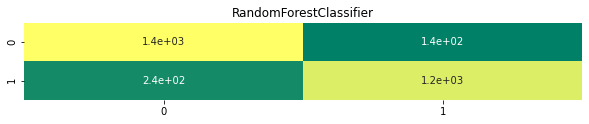



Model: LogisticRegression

LogisticRegression(C=1)


Accuracy Score:  0.88
F1 Score:  0.8752598752598753
AUC_ROC_Score 0.8803692040046862


[[1377  160]
 [ 200 1263]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      1537
           1       0.89      0.86      0.88      1463

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



AxesSubplot(0.125,0.808774;0.775x0.0712264)




Model: SVC

SVC(kernel='linear')


Accuracy Score:  0.8703333333333333
F1 Score:  0.8668264293050325
AUC_ROC_Score 0.8702782981857777


[[1345  192]
 [ 197 1266]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      1537
           1       0.87      0.87      0.87      1463

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



AxesSubplot(0.125,0.808774;0.775x0.0712264)


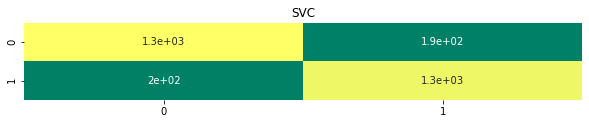

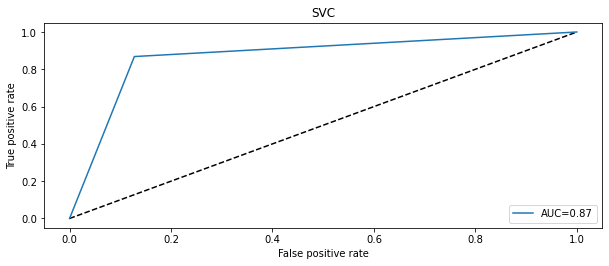



Model: DecisionTreeClassifier

DecisionTreeClassifier()


Accuracy Score:  0.8386666666666667
F1 Score:  0.8317107093184979
AUC_ROC_Score 0.8390920389523691


[[1320  217]
 [ 267 1196]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      1537
           1       0.85      0.82      0.83      1463

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



AxesSubplot(0.125,0.808774;0.775x0.0712264)


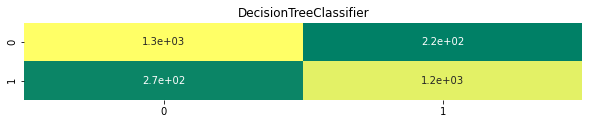

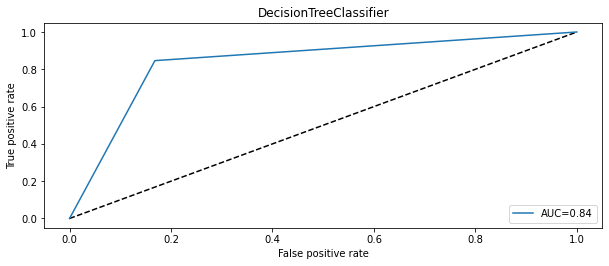

In [67]:
Models=[]
Accuracy1=[]
Auc1=[]
F1=[]

for i,j in Model:
    print('Model: {}\n'.format(i))
    Models.append(i)
    
    j.fit(x_train,y_train)
    print(j)
    pred=j.predict(x_test)
    print('\n')
    
    acc=accuracy_score(pred,y_test)
    print('Accuracy Score: ',acc)
    Accuracy1.append(acc*100)
    
    f1=f1_score(pred,y_test)
    print('F1 Score: ',f1)
    F1.append(f1*100)
    
    false_positive_rate,true_positive_rate,threshold=roc_curve(pred,y_test)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("AUC_ROC_Score",roc_auc)
    Auc1.append(roc_auc*100)
    print("\n")
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print("Classification Report: \n",classification_report(y_test,pred))
    print('\n')
    
    #Confusion Matrix using Heatmap
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(i)
    print(sns.heatmap(cm,annot=True,cbar=False,cmap='summer'))
    plt.show()
    print('\n')
    
    
    #Auc_Roc_curve
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(i)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.show()
    print('\n')

In [68]:
#Dataframe to display all the results from different models.
pd.DataFrame({"Model":Models,"Accuracy Score":Accuracy1,"F1 Score":F1,'ROC_AUC_Score':Auc1})

Model  Accuracy Score   F1 Score  ROC_AUC_Score
0  RandomForestClassifier       87.200000  86.411890      87.399332
1      LogisticRegression       88.000000  87.525988      88.036920
2                     SVC       87.033333  86.682643      87.027830
3  DecisionTreeClassifier       83.866667  83.171071      83.909204

In [69]:
#Saving Random forest classifier as it has accuracy score of 87 F1 score 86. Also being a bagging classifier this model doesnot overfit.
import joblib
joblib.dump(rf,'malignant_rf')

['malignant_rf']

In [70]:
#Loading the test data to predict the label with the saved model
test=pd.read_csv(r'C:\Users\Sachin Koli\Downloads\Malignant Comments Classifier Project/test.csv')
test

id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]

# Data Pre-Processing

In [71]:
# Apply all the lambda functions wrote previously through .map on the comments column
test['comment_text'] = test['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
test['comment_text'][0]

'yo bitch ja rule is more succesful then you ll ever be whats up with you and hating you sad mofuckas   i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me  ja rule is about pride in da music man  dont diss that shit on him  and nothin is wrong bein like tupac he was a brother too   fuckin white boys get things right next time  '

# Lemmatizing and removing stop words

In [72]:
#applying the function process on the comment_text
test['comment_text']=test['comment_text'].apply(process)
test['comment_text'][0]

'yo bitch ja rule succesful ever whats hating sad mofuckas bitch slap ur pethedic white face get kiss as guy sicken ja rule pride da music man dont dis shit nothin wrong bein like tupac brother fuckin white boy get thing right next time'

In [73]:
#Converting comment text to bag of word format using Countvectorizer
cv=CountVectorizer() 
final=cv.fit_transform(test['comment_text'][0:5000]).toarray()

In [74]:
#checking the shape of final.
final.shape

(5000, 20877)

In [75]:
final=final[:,0:18396] # as our training data had 18396 features
final.shape

(5000, 18396)

In [76]:
#importing the saved model to predict the test data.
ld=joblib.load('malignant_rf')
malignant_pred=ld.predict(final)

In [77]:
#Saving the prediction in a csv file.
pd.DataFrame(malignant_pred).to_csv('malignant_predict.csv',index=None)

In [78]:
pd.read_csv('malignant_predict.csv')

0
0     0
1     0
2     0
3     0
4     0
...  ..
4995  0
4996  0
4997  0
4998  1
4999  0

[5000 rows x 1 columns]

# Model Selection for highly Malignant Classification

In [79]:
#reading the data with label malignant
data_high_mal

comment_text  highly_malignant
0       explanation edits made username hardcore metal...                 0
1       aww match background colour seemingly stuck th...                 0
2       hey man really trying edit war guy constantly ...                 0
4                           sir hero chance remember page                 0
5                  congratulation well use tool well talk                 0
...                                                   ...               ...
158911                                       asshole fuck                 1
159096  filthy stinking crow back dirty crow better de...                 1
159099     fucking pathetic moron cc jimbo wale rootmyass                 1
159281         lol gay never know good feel fuck woman as                 1
159312  walter mercado antonio quite frankly fucker co...                 1

[2710 rows x 2 columns]

In [80]:
#Converting comment text to bag of word format using Countvectorizer
cv=CountVectorizer()   #creating object
x=cv.fit_transform(data_high_mal['comment_text']).toarray()
x.shape

(2710, 7474)

In [81]:
y=data_high_mal['highly_malignant']
y.shape

(2710,)

In [82]:
#splitting the data into training and testing and implemeting models.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print('x_train \t x_test \t y_train \t y_test')
print(x_train.shape,'\t',x_test.shape,'\t',y_train.shape,'\t',y_test.shape)

x_train 	 x_test 	 y_train 	 y_test
(1897, 7474) 	 (813, 7474) 	 (1897,) 	 (813,)


Model: RandomForestClassifier

RandomForestClassifier(criterion='entropy', n_estimators=300)


Accuracy Score:  0.9003690036900369
F1 Score:  0.9025270758122743
AUC_ROC_Score 0.9056829967665183


[[357  68]
 [ 13 375]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.84      0.90       425
           1       0.85      0.97      0.90       388

    accuracy                           0.90       813
   macro avg       0.91      0.90      0.90       813
weighted avg       0.91      0.90      0.90       813



AxesSubplot(0.125,0.808774;0.775x0.0712264)


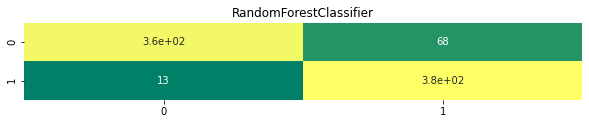

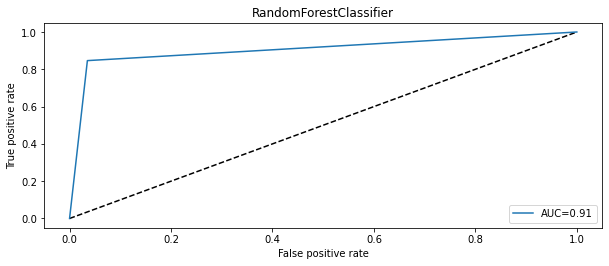



Model: LogisticRegression

LogisticRegression(C=1)


Accuracy Score:  0.9384993849938499
F1 Score:  0.9338624338624338
AUC_ROC_Score 0.9402937225207622


[[410  15]
 [ 35 353]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       425
           1       0.96      0.91      0.93       388

    accuracy                           0.94       813
   macro avg       0.94      0.94      0.94       813
weighted avg       0.94      0.94      0.94       813



AxesSubplot(0.125,0.808774;0.775x0.0712264)


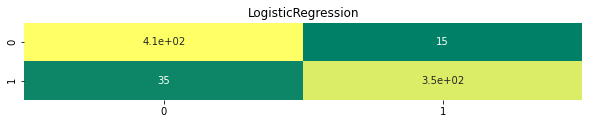

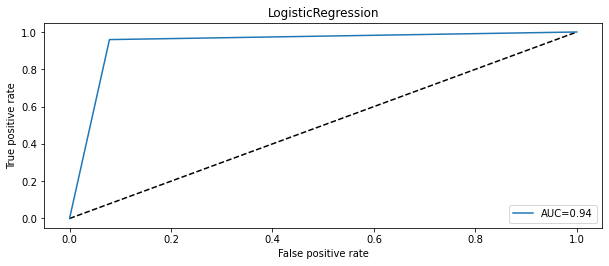



Model: SVC

SVC(kernel='linear')


Accuracy Score:  0.9372693726937269
F1 Score:  0.933852140077821
AUC_ROC_Score 0.9374157508045419


[[402  23]
 [ 28 360]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       425
           1       0.94      0.93      0.93       388

    accuracy                           0.94       813
   macro avg       0.94      0.94      0.94       813
weighted avg       0.94      0.94      0.94       813



AxesSubplot(0.125,0.808774;0.775x0.0712264)


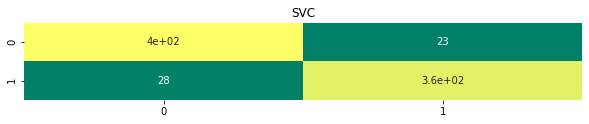

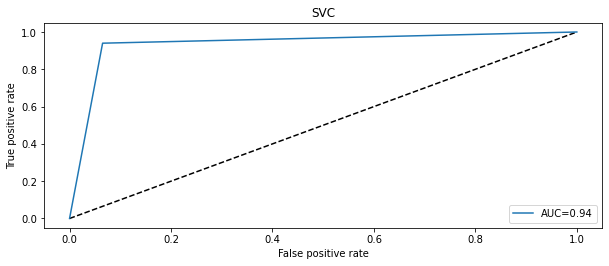



Model: DecisionTreeClassifier

DecisionTreeClassifier()


Accuracy Score:  0.8487084870848709
F1 Score:  0.8537455410225921
AUC_ROC_Score 0.8559694628403238


[[331  94]
 [ 29 359]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.78      0.84       425
           1       0.79      0.93      0.85       388

    accuracy                           0.85       813
   macro avg       0.86      0.85      0.85       813
weighted avg       0.86      0.85      0.85       813



AxesSubplot(0.125,0.808774;0.775x0.0712264)


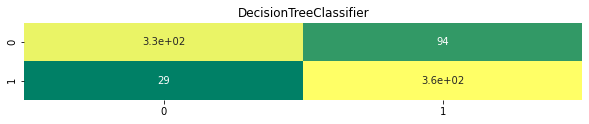

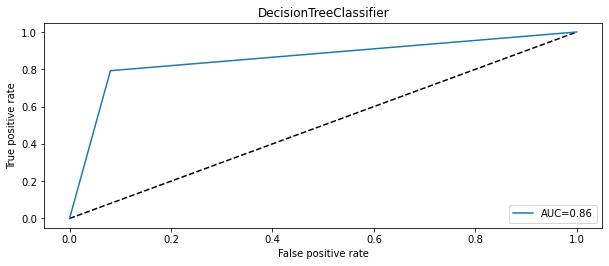

In [83]:
Models=[]
Accuracy1=[]
Auc1=[]
F2=[]

for i,j in Model:
    print('Model: {}\n'.format(i))
    Models.append(i)
    
    j.fit(x_train,y_train)
    print(j)
    pred=j.predict(x_test)
    print('\n')
    
    acc=accuracy_score(pred,y_test)
    print('Accuracy Score: ',acc)
    Accuracy1.append(acc*100)
    
    f1=f1_score(pred,y_test)
    print('F1 Score: ',f1)
    F2.append(f1*100)
    
    false_positive_rate,true_positive_rate,threshold=roc_curve(pred,y_test)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("AUC_ROC_Score",roc_auc)
    Auc1.append(roc_auc*100)
    print("\n")
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print("Classification Report: \n",classification_report(y_test,pred))
    print('\n')
    
    #Confusion Matrix using Heatmap
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(i)
    print(sns.heatmap(cm,annot=True,cbar=False,cmap='summer'))
    plt.show()
    print('\n')
    
    
    #Auc_Roc_curve
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(i)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.show()
    print('\n')

In [84]:
pd.DataFrame({"Model":Models,"Accuracy Score":Accuracy1,"F1 Score":F2,'ROC_AUC_Score':Auc1})

Model  Accuracy Score   F1 Score  ROC_AUC_Score
0  RandomForestClassifier       90.036900  90.252708      90.568300
1      LogisticRegression       93.849938  93.386243      94.029372
2                     SVC       93.726937  93.385214      93.741575
3  DecisionTreeClassifier       84.870849  85.374554      85.596946

In [85]:
#SVC performed better but saving Random forest classifier as it has accuracy score of 91 F1 score 91. Also being a bagging classifier this model doesnot overfit.
import joblib
joblib.dump(rf,'high_malignant_rf')

['high_malignant_rf']

In [86]:
#Test data is big we need to select only a few observations to run the saved model on.
#Converting comment text to bag of word format using Countvectorizer
cv=CountVectorizer() 
final=cv.fit_transform(test['comment_text'][0:5000]).toarray()
final.shape

(5000, 20877)

In [87]:
test_data=final[:,0:7474]  # as our training set had 7474 columns
test_data.shape

(5000, 7474)

In [88]:
#importing the saved model to predict the test dataset. 
ld=joblib.load('high_malignant_rf')
high_mal_pred=ld.predict(test_data)
high_mal_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [89]:
#Creating a csv file from the array file of predicted result.
pd.DataFrame(high_mal_pred).to_csv('high_malignant_predict.csv',index=None)

# Model selection for label Rude

In [90]:
#reading the dataset with label rude
data_rude

comment_text  rude
0       explanation edits made username hardcore metal...     0
1       aww match background colour seemingly stuck th...     0
2       hey man really trying edit war guy constantly ...     0
4                           sir hero chance remember page     0
5                  congratulation well use tool well talk     0
...                                                   ...   ...
110213  vagina include something red head vagina warme...     1
110216                                        put asshole     1
110219                       fucking retard name arsehole     1
110276  however since stupid fuck warned two time with...     1
110290  clearly mistake mine glad arrogant dick whew c...     1

[10000 rows x 2 columns]

In [91]:
#Converting comment text to bag of word format using Countvectorizer
cv=CountVectorizer()   #creating object
x=cv.fit_transform(data_rude['comment_text']).toarray()
x.shape

(10000, 17910)

In [92]:
#separating label 
y=data_rude['rude']
y.shape

(10000,)

In [93]:
#splitting the data into training and testing and implemeting models.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print('x_train \t x_test \t y_train \t y_test')
print(x_train.shape,'\t',x_test.shape,'\t',y_train.shape,'\t',y_test.shape)

x_train 	 x_test 	 y_train 	 y_test
(7000, 17910) 	 (3000, 17910) 	 (7000,) 	 (3000,)


Model: RandomForestClassifier

RandomForestClassifier(criterion='entropy', n_estimators=300)


Accuracy Score:  0.926
F1 Score:  0.9226480836236933
AUC_ROC_Score 0.9268762456215024


[[1454   83]
 [ 139 1324]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      1537
           1       0.94      0.90      0.92      1463

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



AxesSubplot(0.125,0.808774;0.775x0.0712264)


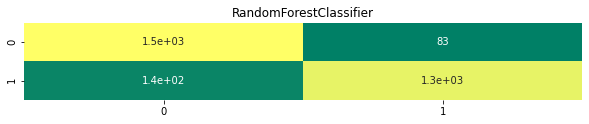

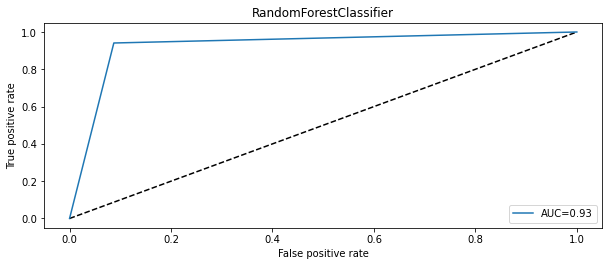



Model: LogisticRegression

LogisticRegression(C=1)


Accuracy Score:  0.93
F1 Score:  0.9264190609670637
AUC_ROC_Score 0.9313816646925387


[[1468   69]
 [ 141 1322]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      1537
           1       0.95      0.90      0.93      1463

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



AxesSubplot(0.125,0.808774;0.775x0.0712264)


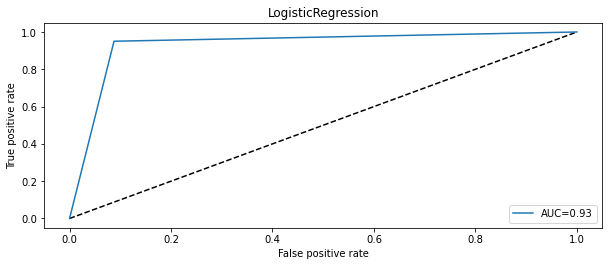



Model: SVC

SVC(kernel='linear')


Accuracy Score:  0.9293333333333333
F1 Score:  0.9266435986159168
AUC_ROC_Score 0.9297509523667388


[[1449   88]
 [ 124 1339]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      1537
           1       0.94      0.92      0.93      1463

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



AxesSubplot(0.125,0.808774;0.775x0.0712264)


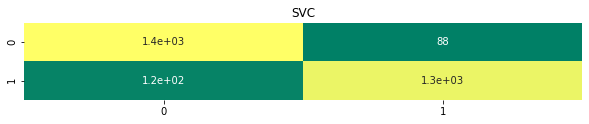



Model: DecisionTreeClassifier

DecisionTreeClassifier()


Accuracy Score:  0.9346666666666666
F1 Score:  0.9326460481099657
AUC_ROC_Score 0.9347736796738685


[[1447   90]
 [ 106 1357]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1537
           1       0.94      0.93      0.93      1463

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



AxesSubplot(0.125,0.808774;0.775x0.0712264)


In [94]:
#Running dataset on different models
Models=[]
Accuracy1=[]
Auc1=[]
F3=[]

for i,j in Model:
    print('Model: {}\n'.format(i))
    Models.append(i)
    
    j.fit(x_train,y_train)
    print(j)
    pred=j.predict(x_test)
    print('\n')
    
    acc=accuracy_score(pred,y_test)
    print('Accuracy Score: ',acc)
    Accuracy1.append(acc*100)
    
    f1=f1_score(pred,y_test)
    print('F1 Score: ',f1)
    F3.append(f1*100)
    
    false_positive_rate,true_positive_rate,threshold=roc_curve(pred,y_test)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("AUC_ROC_Score",roc_auc)
    Auc1.append(roc_auc*100)
    print("\n")
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print("Classification Report: \n",classification_report(y_test,pred))
    print('\n')
    
    #Confusion Matrix using Heatmap
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(i)
    print(sns.heatmap(cm,annot=True,cbar=False,cmap='summer'))
    plt.show()
    print('\n')
    
    
    #Auc_Roc_curve
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(i)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.show()
    print('\n')

In [96]:
#Creating a dataframe to visualize all the results from the models.
pd.DataFrame({"Model":Models,"Accuracy Score":Accuracy1,"F1 Score":F3,'ROC_AUC_Score':Auc1})

Model  Accuracy Score   F1 Score  ROC_AUC_Score
0  RandomForestClassifier       92.600000  92.264808      92.687625
1      LogisticRegression       93.000000  92.641906      93.138166
2                     SVC       92.933333  92.664360      92.975095
3  DecisionTreeClassifier       93.466667  93.264605      93.477368

In [97]:
#Saving Random forest classifier as it has accuracy score of 92.5 F1 score 92.1. Also being a bagging classifier this model doesnot overfit.
import joblib
joblib.dump(rf,'rude_rf')

['rude_rf']

In [98]:
#Test data is big so we need to select only a few observations to run the saved model on.
#Converting comment text to bag of word format using Countvectorizer
cv=CountVectorizer() 
final=cv.fit_transform(test['comment_text'][0:5000]).toarray()
final.shape

(5000, 20877)

In [99]:
test_data=final[:,0:17910]  # as our training set had 17910 columns
test_data.shape

(5000, 17910)

In [100]:
#importing the saved model and predicting the test data
ld=joblib.load('rude_rf')
rude_pred=ld.predict(test_data)

In [101]:
#reading the prediction
rude_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
#Creating a dataframe of the predictions.
pd.DataFrame(rude_pred).to_csv('rude_predict.csv',index=None)

# Model selection for label 'Threat'

In [104]:
#Reading the daatset with lable threat
data_threat

comment_text  threat
0       explanation edits made username hardcore metal...       0
1       aww match background colour seemingly stuck th...       0
2       hey man really trying edit war guy constantly ...       0
4                           sir hero chance remember page       0
5                  congratulation well use tool well talk       0
...                                                   ...     ...
157695  really hate tommy dont understand cant actuall...       1
157718  bitch fucking hore suck dick big as hole gay f...       1
158717   stupid head dumb stupid die die die go suck butt       1
158856  hey hey faggot dead yet watching mom getting r...       1
159029                                    death musulmans       1

[2060 rows x 2 columns]

In [105]:
#Converting comment text to bag of word format using Countvectorizer
cv=CountVectorizer()   #creating object
x=cv.fit_transform(data_threat['comment_text']).toarray()
x.shape

(2060, 7015)

In [106]:
#separating the label
y=data_threat['threat']
y.shape

(2060,)

In [107]:
#splitting the data into training and testing and implemeting models.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print('x_train \t x_test \t y_train \t y_test')
print(x_train.shape,'\t',x_test.shape,'\t',y_train.shape,'\t',y_test.shape)

x_train 	 x_test 	 y_train 	 y_test
(1442, 7015) 	 (618, 7015) 	 (1442,) 	 (618,)


Model: RandomForestClassifier

RandomForestClassifier(criterion='entropy', n_estimators=300)


Accuracy Score:  0.93042071197411
F1 Score:  0.8
AUC_ROC_Score 0.9201267988326457


[[489   9]
 [ 34  86]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       498
           1       0.91      0.72      0.80       120

    accuracy                           0.93       618
   macro avg       0.92      0.85      0.88       618
weighted avg       0.93      0.93      0.93       618



AxesSubplot(0.125,0.808774;0.775x0.0712264)


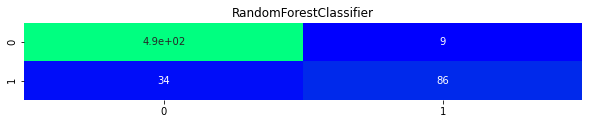

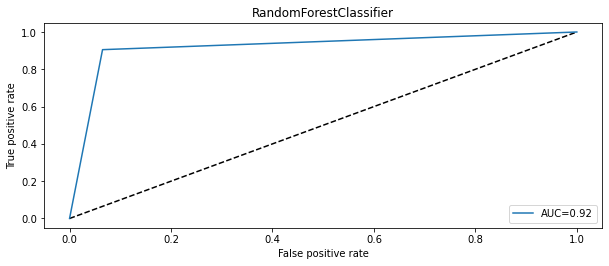



Model: LogisticRegression

LogisticRegression(C=1)


Accuracy Score:  0.9207119741100324
F1 Score:  0.7632850241545893
AUC_ROC_Score 0.9154165854925645


[[490   8]
 [ 41  79]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       498
           1       0.91      0.66      0.76       120

    accuracy                           0.92       618
   macro avg       0.92      0.82      0.86       618
weighted avg       0.92      0.92      0.92       618



AxesSubplot(0.125,0.808774;0.775x0.0712264)


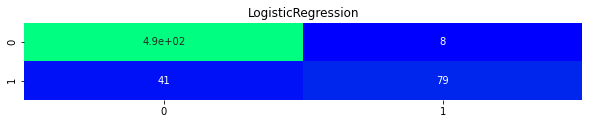



Model: SVC

SVC(kernel='linear')


Accuracy Score:  0.9449838187702265
F1 Score:  0.8495575221238938
AUC_ROC_Score 0.9293926886792453


[[488  10]
 [ 24  96]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       498
           1       0.91      0.80      0.85       120

    accuracy                           0.94       618
   macro avg       0.93      0.89      0.91       618
weighted avg       0.94      0.94      0.94       618



AxesSubplot(0.125,0.808774;0.775x0.0712264)


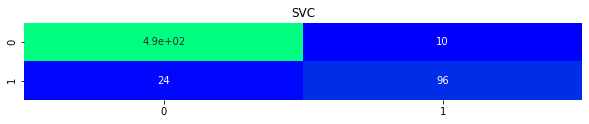

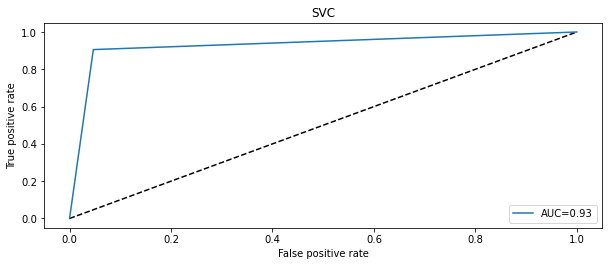



Model: DecisionTreeClassifier

DecisionTreeClassifier()


Accuracy Score:  0.9110032362459547
F1 Score:  0.7659574468085107
AUC_ROC_Score 0.8614832742674389


[[473  25]
 [ 30  90]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       498
           1       0.78      0.75      0.77       120

    accuracy                           0.91       618
   macro avg       0.86      0.85      0.86       618
weighted avg       0.91      0.91      0.91       618



AxesSubplot(0.125,0.808774;0.775x0.0712264)


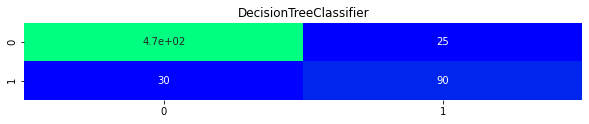

In [108]:
#Running dataset on different models
Models=[]
Accuracy1=[]
Auc1=[]
F4=[]

for i,j in Model:
    print('Model: {}\n'.format(i))
    Models.append(i)
    
    j.fit(x_train,y_train)
    print(j)
    pred=j.predict(x_test)
    print('\n')
    
    acc=accuracy_score(pred,y_test)
    print('Accuracy Score: ',acc)
    Accuracy1.append(acc*100)
    
    f1=f1_score(pred,y_test)
    print('F1 Score: ',f1)
    F4.append(f1*100)
    
    false_positive_rate,true_positive_rate,threshold=roc_curve(pred,y_test)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("AUC_ROC_Score",roc_auc)
    Auc1.append(roc_auc*100)
    print("\n")
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print("Classification Report: \n",classification_report(y_test,pred))
    print('\n')
    
    #Confusion Matrix using Heatmap
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(i)
    print(sns.heatmap(cm,annot=True,cbar=False,cmap='winter'))
    plt.show()
    print('\n')
    
    
    #Auc_Roc_curve
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(i)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.show()
    print('\n')

In [109]:
#Creating a dataframe to display all the results from the models.
pd.DataFrame({"Model":Models,"Accuracy Score":Accuracy1,"F1 Score":F4,'ROC_AUC_Score':Auc1})

Model  Accuracy Score   F1 Score  ROC_AUC_Score
0  RandomForestClassifier       93.042071  80.000000      92.012680
1      LogisticRegression       92.071197  76.328502      91.541659
2                     SVC       94.498382  84.955752      92.939269
3  DecisionTreeClassifier       91.100324  76.595745      86.148327

In [110]:
#All the models gave good accuracy score.
#Saving Random forest classifier as it has accuracy score of 92.7 F1 score 78.87. Also being a bagging classifier this model doesnot overfit.
import joblib
joblib.dump(rf,'threat_rf')

['threat_rf']

In [111]:
#Test data is big we need to select only a few observations to run the saved model on.
#Converting comment text to bag of word format using Countvectorizer
cv=CountVectorizer() 
final=cv.fit_transform(test['comment_text'][0:5000]).toarray()
final.shape

(5000, 20877)

In [112]:
test_data=final[:,0:7015]  # as our training set had 7015 columns
test_data.shape

(5000, 7015)

In [113]:
#importing the saved model and predicting the test data
ld=joblib.load('threat_rf')
threat_pred=ld.predict(test_data)

In [114]:
#predicted values
threat_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
#Creating a dataframe of the predictions.
pd.DataFrame(threat_pred).to_csv('threat_predict.csv',index=None)

# Model selection for label 'Abuse'

In [116]:
#Reading the dataset with label abuse
data_abuse

comment_text  abuse
0       explanation edits made username hardcore metal...      0
1       aww match background colour seemingly stuck th...      0
2       hey man really trying edit war guy constantly ...      0
4                           sir hero chance remember page      0
5                  congratulation well use tool well talk      0
...                                                   ...    ...
117057                    could fucking leave alone bitch      1
117066  fuck subhuman scum lost right demand civility ...      1
117078                                   rat bastard know      1
117140                  gay fucking cockface shit as cunt      1
117142  plain fanatic stupid stupid herd member victim...      1

[10000 rows x 2 columns]

In [117]:
#Converting comment text to bag of word format using Countvectorizer
cv=CountVectorizer()   #creating object
x=cv.fit_transform(data_abuse['comment_text']).toarray()
x.shape

(10000, 18026)

In [118]:
#separating the label
y=data_abuse['abuse']
y.shape

(10000,)

In [119]:
#splitting the data into training and testing and implemeting models.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print('x_train \t x_test \t y_train \t y_test')
print(x_train.shape,'\t',x_test.shape,'\t',y_train.shape,'\t',y_test.shape)

x_train 	 x_test 	 y_train 	 y_test
(7000, 18026) 	 (3000, 18026) 	 (7000,) 	 (3000,)


Model: RandomForestClassifier

RandomForestClassifier(criterion='entropy', n_estimators=300)


Accuracy Score:  0.9023333333333333
F1 Score:  0.8977312390924956
AUC_ROC_Score 0.9032488006584549


[[1421  116]
 [ 177 1286]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      1537
           1       0.92      0.88      0.90      1463

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



AxesSubplot(0.125,0.808774;0.775x0.0712264)




Model: LogisticRegression

LogisticRegression(C=1)


Accuracy Score:  0.911
F1 Score:  0.9068712940355772
AUC_ROC_Score 0.9118978000556949


[[1433  104]
 [ 163 1300]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      1537
           1       0.93      0.89      0.91      1463

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



AxesSubplot(0.125,0.808774;0.775x0.0712264)




Model: SVC

SVC(kernel='linear')


Accuracy Score:  0.9036666666666666
F1 Score:  0.9003104518799586
AUC_ROC_Score 0.9038756776781198


[[1406  131]
 [ 158 1305]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      1537
           1       0.91      0.89      0.90      1463

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



AxesSubplot(0.125,0.808774;0.775x0.0712264)


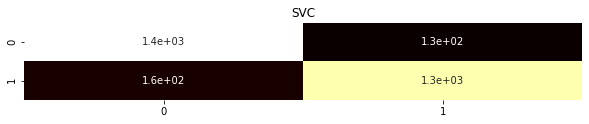

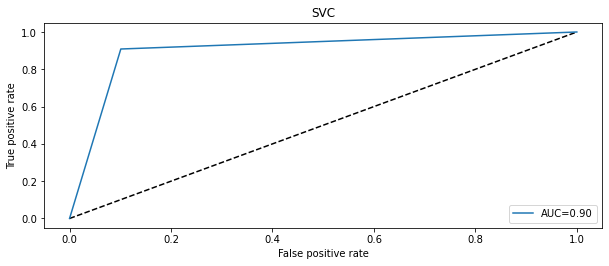



Model: DecisionTreeClassifier

DecisionTreeClassifier()


Accuracy Score:  0.9006666666666666
F1 Score:  0.8978752570253598
AUC_ROC_Score 0.9006572581990457


[[1392  145]
 [ 153 1310]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      1537
           1       0.90      0.90      0.90      1463

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



AxesSubplot(0.125,0.808774;0.775x0.0712264)


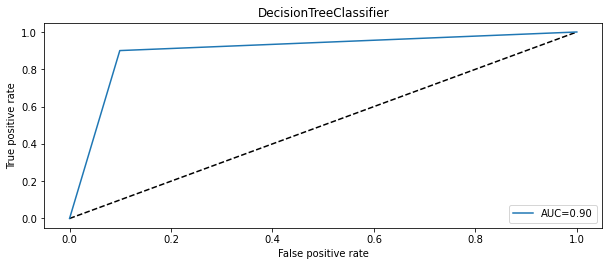

In [120]:
#Running dataset on different models
Models=[]
Accuracy1=[]
Auc1=[]
F5=[]

for i,j in Model:
    print('Model: {}\n'.format(i))
    Models.append(i)
    
    j.fit(x_train,y_train)
    print(j)
    pred=j.predict(x_test)
    print('\n')
    
    acc=accuracy_score(pred,y_test)
    print('Accuracy Score: ',acc)
    Accuracy1.append(acc*100)
    
    f1=f1_score(pred,y_test)
    print('F1 Score: ',f1)
    F5.append(f1*100)
    
    false_positive_rate,true_positive_rate,threshold=roc_curve(pred,y_test)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("AUC_ROC_Score",roc_auc)
    Auc1.append(roc_auc*100)
    print("\n")
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print("Classification Report: \n",classification_report(y_test,pred))
    print('\n')
    
    #Confusion Matrix using Heatmap
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(i)
    print(sns.heatmap(cm,annot=True,cbar=False,cmap='hot'))
    plt.show()
    print('\n')
    
    
    #Auc_Roc_curve
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(i)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.show()
    print('\n')

In [121]:
#Creating a dataframe to display all the results from the models.
pd.DataFrame({"Model":Models,"Accuracy Score":Accuracy1,"F1 Score":F5,'ROC_AUC_Score':Auc1})

Model  Accuracy Score   F1 Score  ROC_AUC_Score
0  RandomForestClassifier       90.233333  89.773124      90.324880
1      LogisticRegression       91.100000  90.687129      91.189780
2                     SVC       90.366667  90.031045      90.387568
3  DecisionTreeClassifier       90.066667  89.787526      90.065726

In [122]:
#Random forest, logistic regression performed well.
#Saving Random forest classifier as it has accuracy score of 90 F1 score 89.56. Also being a bagging classifier this model doesnot overfit.
import joblib
joblib.dump(rf,'abuse_rf')

['abuse_rf']

In [123]:
#Predicting test data
#Test data is big we need to select only a few observations to run the saved model on.
#Converting comment text to bag of word format using Countvectorizer
cv=CountVectorizer() 
final=cv.fit_transform(test['comment_text'][0:5000]).toarray()
final.shape

(5000, 20877)

In [124]:
test_data=final[:,0:18026]  # as our training set had 18026 columns
test_data.shape

(5000, 18026)

In [125]:
#importing the saved model and predicting the test data
ld=joblib.load('abuse_rf')
abuse_pred=ld.predict(test_data)

In [126]:
#predicted labels
abuse_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [127]:
#Saving the predictions in a csv file
pd.DataFrame(abuse_pred).to_csv('abuse_predict.csv',index=None)

# Model selection for label 'Loathe'

In [128]:
#reading the dataset with lable 'loathe'
data_loathe

comment_text  loathe
0       explanation edits made username hardcore metal...       0
1       aww match background colour seemingly stuck th...       0
2       hey man really trying edit war guy constantly ...       0
4                           sir hero chance remember page       0
5                  congratulation well use tool well talk       0
...                                                   ...     ...
159033                               shut faggot july utc       1
159239  whats gook whats asian gook chink man hoe chow...       1
159281         lol gay never know good feel fuck woman as       1
159336  oh fuck pansy jew would whine b nai brith beat...       1
159449                                      think gay fag       1

[5895 rows x 2 columns]

In [129]:
#Converting comment text to bag of word format using Countvectorizer
cv=CountVectorizer()   #creating object
x=cv.fit_transform(data_loathe['comment_text']).toarray()
x.shape

(5895, 13761)

In [130]:
#separating the label
y=data_loathe['loathe']
y.shape

(5895,)

In [131]:
#splitting the data into training and testing and implemeting models.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print('x_train \t x_test \t y_train \t y_test')
print(x_train.shape,'\t',x_test.shape,'\t',y_train.shape,'\t',y_test.shape)

x_train 	 x_test 	 y_train 	 y_test
(4126, 13761) 	 (1769, 13761) 	 (4126,) 	 (1769,)


Model: RandomForestClassifier

RandomForestClassifier(criterion='entropy', n_estimators=300)


Accuracy Score:  0.9265121537591859
F1 Score:  0.803030303030303
AUC_ROC_Score 0.8951633430467296


[[1374   48]
 [  82  265]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      1422
           1       0.85      0.76      0.80       347

    accuracy                           0.93      1769
   macro avg       0.90      0.86      0.88      1769
weighted avg       0.92      0.93      0.93      1769



AxesSubplot(0.125,0.808774;0.775x0.0712264)


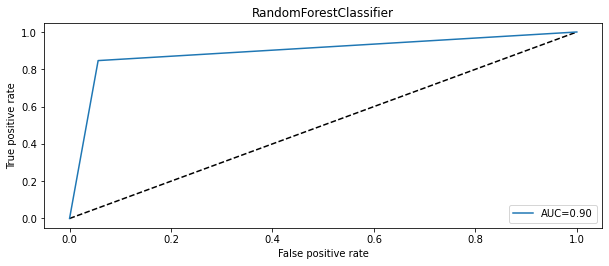



Model: LogisticRegression

LogisticRegression(C=1)


Accuracy Score:  0.933295647258338
F1 Score:  0.8201219512195121
AUC_ROC_Score 0.9085627521390256


[[1382   40]
 [  78  269]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1422
           1       0.87      0.78      0.82       347

    accuracy                           0.93      1769
   macro avg       0.91      0.87      0.89      1769
weighted avg       0.93      0.93      0.93      1769



AxesSubplot(0.125,0.808774;0.775x0.0712264)


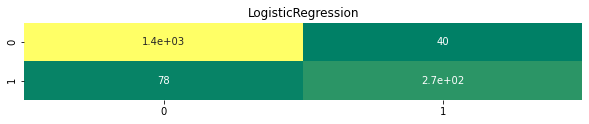

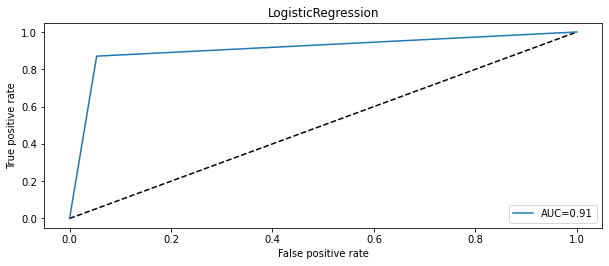



Model: SVC

SVC(kernel='linear')


Accuracy Score:  0.929903900508762
F1 Score:  0.8218390804597702
AUC_ROC_Score 0.888263247104403


[[1359   63]
 [  61  286]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1422
           1       0.82      0.82      0.82       347

    accuracy                           0.93      1769
   macro avg       0.89      0.89      0.89      1769
weighted avg       0.93      0.93      0.93      1769



AxesSubplot(0.125,0.808774;0.775x0.0712264)


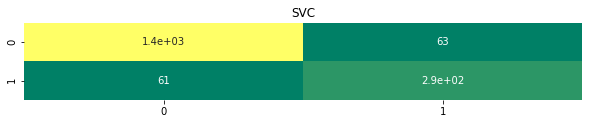



Model: DecisionTreeClassifier

DecisionTreeClassifier()


Accuracy Score:  0.9095534200113058
F1 Score:  0.7746478873239436
AUC_ROC_Score 0.8531833268675374


[[1334   88]
 [  72  275]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1422
           1       0.76      0.79      0.77       347

    accuracy                           0.91      1769
   macro avg       0.85      0.87      0.86      1769
weighted avg       0.91      0.91      0.91      1769



AxesSubplot(0.125,0.808774;0.775x0.0712264)


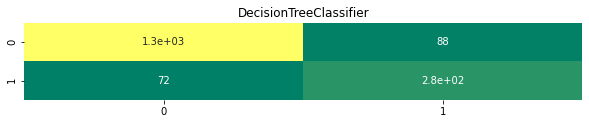

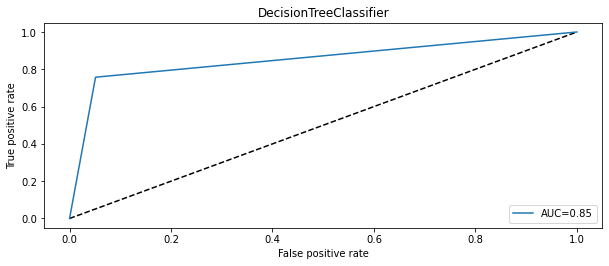

In [132]:
#Running dataset on different models
Models=[]
Accuracy1=[]
Auc1=[]
F6=[]

for i,j in Model:
    print('Model: {}\n'.format(i))
    Models.append(i)
    
    j.fit(x_train,y_train)
    print(j)
    pred=j.predict(x_test)
    print('\n')
    
    acc=accuracy_score(pred,y_test)
    print('Accuracy Score: ',acc)
    Accuracy1.append(acc*100)
    
    f1=f1_score(pred,y_test)
    print('F1 Score: ',f1)
    F6.append(f1*100)
    
    false_positive_rate,true_positive_rate,threshold=roc_curve(pred,y_test)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("AUC_ROC_Score",roc_auc)
    Auc1.append(roc_auc*100)
    print("\n")
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print("Classification Report: \n",classification_report(y_test,pred))
    print('\n')
    
    #Confusion Matrix using Heatmap
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(i)
    print(sns.heatmap(cm,annot=True,cbar=False,cmap='summer'))
    plt.show()
    print('\n')
    
    
    #Auc_Roc_curve
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(i)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.show()
    print('\n')

In [133]:
#Creating a dataframe to display all the results from the models.
pd.DataFrame({"Model":Models,"Accuracy Score":Accuracy1,"F1 Score":F6,'ROC_AUC_Score':Auc1})

Model  Accuracy Score   F1 Score  ROC_AUC_Score
0  RandomForestClassifier       92.651215  80.303030      89.516334
1      LogisticRegression       93.329565  82.012195      90.856275
2                     SVC       92.990390  82.183908      88.826325
3  DecisionTreeClassifier       90.955342  77.464789      85.318333

In [134]:
#All the models gave an accuracy score greater than 90.
#Saving Random forest classifier as it has accuracy score of 90 F1 score 89.56. Also being a bagging classifier this model doesnot overfit.
import joblib
joblib.dump(rf,'loathe_rf')

['loathe_rf']

In [135]:
#Predicting test data
#Test data is big we need to select only a few observations to run the saved model on.
#Converting comment text to bag of word format using Countvectorizer
cv=CountVectorizer() 
final=cv.fit_transform(test['comment_text'][0:5000]).toarray()
final.shape

(5000, 20877)

In [136]:
test_data=final[:,0:13761]  # as our training set had 13761 columns
test_data.shape

(5000, 13761)

In [137]:
#importing the saved model and predicting the test data
ld=joblib.load('loathe_rf')
loathe_pred=ld.predict(test_data)

In [138]:
#predicted results
loathe_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [139]:
#Saving the predictions in a csv file
pd.DataFrame(loathe_pred).to_csv('loathe_predict.csv',index=None)

In [140]:
#reading all the csv files and concatenating to a single file
a=pd.read_csv('malignant_predict.csv')
b=pd.read_csv('high_malignant_predict.csv')
c=pd.read_csv('rude_predict.csv')
d=pd.read_csv('threat_predict.csv')
e=pd.read_csv('loathe_predict.csv')

In [141]:
#combining all the csv files into one dataframe
prediction=pd.concat([a,b,c,d,e],axis=1,ignore_index=True)

In [142]:
prediction=prediction.rename(columns={0:'Malignant',1:'Highly_Malignant',2:'Rude',3:'Threat',4:'Abuse',5:'Loathe'})
prediction

Malignant  Highly_Malignant  Rude  Threat  Abuse
0             0                 1     1       0      0
1             0                 1     0       0      0
2             0                 1     0       0      0
3             0                 1     0       0      0
4             0                 1     0       0      0
...         ...               ...   ...     ...    ...
4995          0                 1     1       0      0
4996          0                 1     1       0      1
4997          0                 1     0       0      0
4998          1                 0     0       0      0
4999          0                 0     0       0      0

[5000 rows x 5 columns]

In [143]:
#Converting dataframe to csv.
prediction.to_csv('malignant_test.csv')

In [144]:
#Combining f1 scores of all the labels.
f1_scores= pd.DataFrame(np.column_stack([F1, F2, F3, F4, F5, F6]), columns=['Malignant', 'Highly Malignant', 'Rude', 'Threat', 'Abuse', 'Loathe'])
f1_scores=f1_scores.rename(index={0:'Random Forest',1:'Logistic Regression',2:'SVC',3:'Decision Tree'})

In [145]:
#reading the data of f1 scores.
f1_scores

Malignant  Highly Malignant       Rude     Threat  \
Random Forest        86.411890         90.252708  92.264808  80.000000   
Logistic Regression  87.525988         93.386243  92.641906  76.328502   
SVC                  86.682643         93.385214  92.664360  84.955752   
Decision Tree        83.171071         85.374554  93.264605  76.595745   

                         Abuse     Loathe  
Random Forest        89.773124  80.303030  
Logistic Regression  90.687129  82.012195  
SVC                  90.031045  82.183908  
Decision Tree        89.787526  77.464789